<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>
<h3 align="center"> Name: Chia-Yu Wei   Date: 2/18/2023 </h3>

### Task 1: Load the Data and Libraries
---

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
plt.style.use('ggplot')
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
# Insert the data.
data = pd.read_csv('bike_sharing_data.txt')
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
# Know more about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Population  97 non-null     float64
 1   Profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 2: Visualize the Data
---

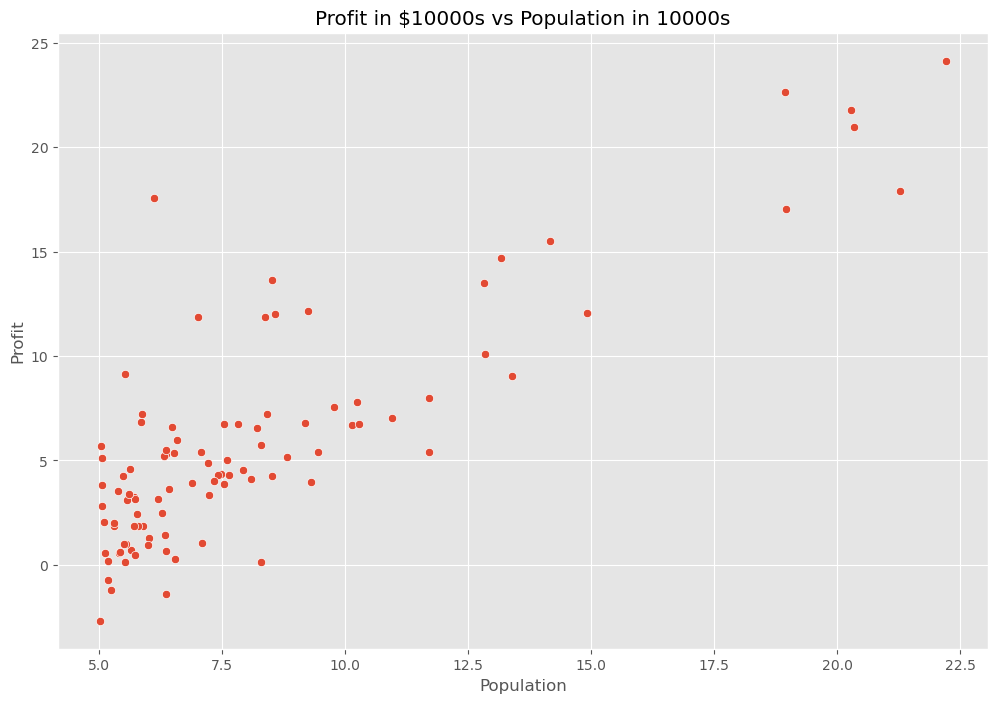

In [6]:
ax = sns.scatterplot(x = 'Population', y = 'Profit', data = data)
ax.set_title('Profit in $10000s vs Population in 10000s');

### Task 3: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [7]:
def cost_function(x, y, theta):
    m = len(y)
    pre_y = x.dot(theta)
    error = (pre_y - y) ** 2
    
    return (1 / (2 * m)) * np.sum(error)

**np.ones(m, 1)**: Crteate an mx1 array with all of elements are 1.    
**data.Population.values.reshape(m, 1)**: Reshape the values in Population into mx1 array.   
**np.append()**: Append two array into one array. The axis=1 argument specifies that the arrays should be concatenated along the columns.

In [8]:
m = data.Population.values.size   #There is 97 rows
x = np.append(np.ones((m, 1)), data.Population.values.reshape(m, 1), axis = 1)   #97 x 2
y = data.Profit.values.reshape(m, 1)
theta = np.zeros((2, 1))          #2 x 1

#Calculate minimum cost
cost_function(x, y, theta)

32.072733877455676

### Task 4: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [9]:
def gradient_descent(x, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(), (y_pred - y))
        theta = theta - alpha * (1/m) * error
        costs.append(cost_function(x, y, theta))
    return theta, costs

In [10]:
theta, costs = gradient_descent(x, y, theta, alpha = 0.01, iterations = 2000)
print("h(x) = {} + {}x1".format(str(round(theta[0, 0], 2)),
                               str(round(theta[1, 0], 2))))

h(x) = -3.79 + 1.18x1


### Task 5: Visualising the Cost Function $J(\theta)$
---

**np.linspace**: It is a function that is used to create an array of evenly spaced numbers over a specified range. 

In [11]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array(theta_0[i], theta_1[j])   #Select theta0 and 1
        cost_values[i, j] = cost_function(x, y, t)

In [12]:
fig = plt.figure(figsize = (12, 8))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink = 0.5, aspect = 5)

plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
ax.set_title("$J(\Theta)$")
ax.view_init(30, 330)

plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 1200x800 with 0 Axes>

### Task 6: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

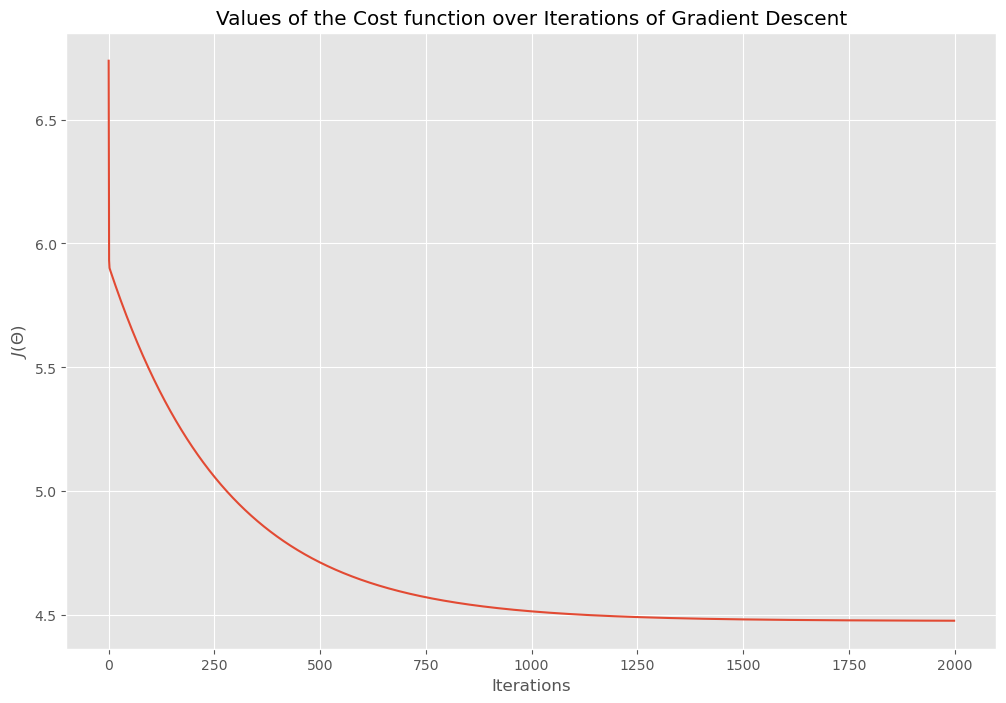

In [13]:
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('$J(\Theta)$')
plt.title('Values of the Cost function over Iterations of Gradient Descent');

### Task 7: Training Data with Linear Regression Fit
---

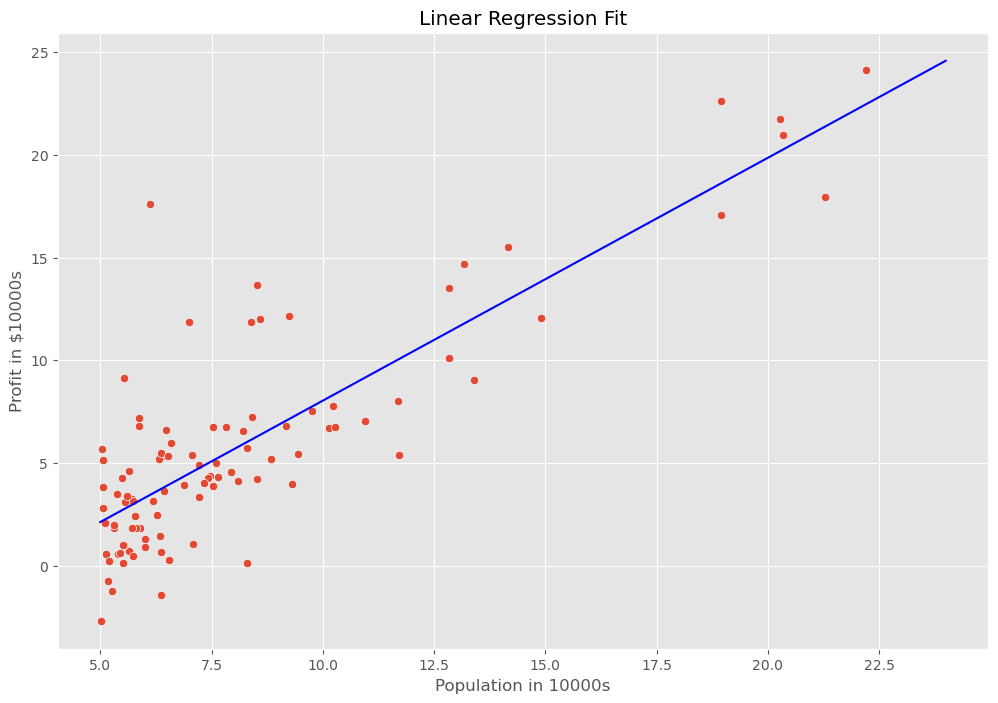

In [14]:
theta = np.squeeze(theta)

x_value = [x for x in range(5, 25)]
y_value = [(theta[0] + (x * theta[1])) for x in x_value]

sns.scatterplot(x = "Population", y = "Profit", data = data)
sns.lineplot(x = x_value, y = y_value, color = "blue")

plt.xlabel("Population in 10000s")
plt.ylabel("Profit in $10000s")
plt.title("Linear Regression Fit");

### Task 8: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [15]:
# Create a predicted foction
def predict(x, theta):
    pred = np.dot(theta.transpose(), x)
    return pred

In [16]:
y_pred_1 = predict(np.array([1, 4]), theta) * 10000
print("For a population of 40,000 people, the model predicts a profit of $" + str(round(y_pred_1)))

For a population of 40,000 people, the model predicts a profit of $9408


In [17]:
y_pred_2 = predict(np.array([1, 8.3]), theta) * 10000
print("For a population of 83,000 people, the model predicts a profit of $" + str(round(y_pred_2)))

For a population of 83,000 people, the model predicts a profit of $60243
